In [1]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.getcwd())

sys.path.append(str(curr_dir.parent.parent.absolute()))

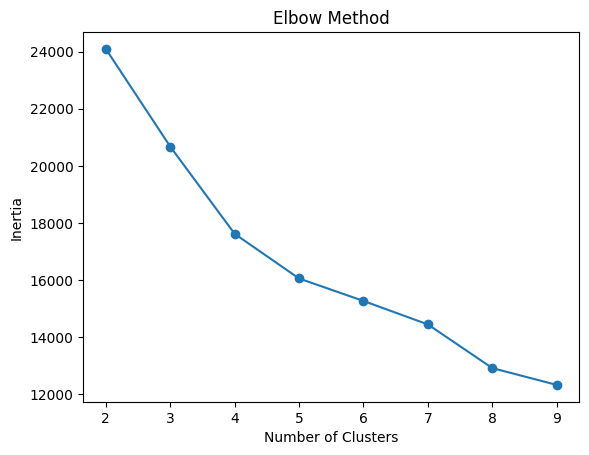

Silhouette Score: 0.31580497204407815


/tmp/ipykernel_2373/3057494313.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)


In [2]:
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

from stocks.resource import camel_to_snake, StocksDataAPI


df = StocksDataAPI().stock_info



# Select relevant features for clustering
features = list(
    map(
        camel_to_snake,
        [
            "marketCap",
            "enterpriseValue",
            "totalRevenue",
            "ebitda",
            "freeCashflow",
            "priceToBook",
            "priceToSalesTrailing12Months",
            "enterpriseToRevenue",
            "enterpriseToEbitda",
            "trailingPE",
            "profitMargins",
            "grossMargins",
            "ebitdaMargins",
            "operatingMargins",
            "earningsGrowth",
            "revenueGrowth",
            "earningsQuarterlyGrowth",
            "netIncomeToCommon",
            "trailingEps",
            "debtToEquity",
            "quickRatio",
            "currentRatio",
            "returnOnAssets",
            "returnOnEquity",
            "beta",
            "fiftyTwoWeekLow",
            "fiftyTwoWeekHigh",
            "fiftyDayAverage",
            "twoHundredDayAverage",
        ],
    )
)

# Filter out stocks with missing values in the selected features
df_filtered = df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered[features])

# Convert scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


# Plot the elbow curve
plt.plot(range(2, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Based on the elbow method, choose an optimal number of clusters
optimal_clusters = 7  # choice based on elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered["Cluster"] = kmeans.fit_predict(scaled_df)

# Calculate silhouette score to evaluate clustering quality
sil_score = silhouette_score(scaled_df, df_filtered["Cluster"])
print(f"Silhouette Score: {sil_score}")

In [3]:
df_filtered

,Unnamed: 0,symbol,name_of_company,series,date_of_listing,isin_number,industry_key,sector_key,macro,basic_industry,...,gross_margins,ebitda_margins,operating_margins,return_on_assets,return_on_equity,long_business_summary,beta,recommendation_key,market_cap_rank,Cluster
0,0,PAVNAIND,Pavna Industries Limited,EQ,01-JUN-2023,INE07S101020,auto-parts,consumer-cyclical,Consumer Discretionary,Auto Components & Equipments,...,0.36104,0.10885,0.11706,0.05543,0.15119,"Pavna Industries Limited, together with its su...",-0.607,none,1415.0,0
5,5,TITAN,Titan Company Limited,EQ,24-SEP-2004,INE280A01028,luxury-goods,consumer-cyclical,Consumer Discretionary,Gems Jewellery And Watches,...,0.22702,0.09680,0.08316,0.10060,0.32831,"Titan Company Limited, together with its subsi...",0.467,buy,30.0,3
6,6,VERTOZ,Vertoz Advertising Limited,BE,14-MAY-2020,INE188Y01015,software-infrastructure,technology,Consumer Discretionary,Advertising & Media Agencies,...,0.18771,0.13276,0.08349,0.06170,0.12343,Vertoz Limited engages in the programmatic adv...,1.346,none,868.0,0
7,7,USHAMART,Usha Martin Limited,EQ,11-OCT-2000,INE228A01035,steel,basic-materials,Industrials,Iron & Steel Products,...,0.49357,0.18794,0.16457,0.10464,0.19195,"Usha Martin Limited, together with its subsidi...",0.676,none,479.0,0
9,9,ECLERX,eClerx Services Limited,EQ,31-DEC-2007,INE738I01010,information-technology-services,technology,Services,Business Process Outsourcing (BPO)/ Knowledge ...,...,0.38329,0.27253,0.21134,0.15551,0.25806,eClerx Services Limited engages in the provisi...,1.081,buy,475.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1960,IRCON,Ircon International Limited,EQ,28-SEP-2018,INE962Y01021,other_industry,other_sector,Industrials,Civil Construction,...,0.10918,0.07494,0.06925,0.03122,0.16702,"Ircon International Limited, together with its...",0.711,hold,279.0,0
1961,1961,NATCOPHARM,Natco Pharma Limited,EQ,27-DEC-1995,INE987B01026,other_industry,other_sector,Healthcare,Pharmaceuticals,...,0.82636,0.45543,0.41355,0.16841,0.25884,"NATCO Pharma Limited, a pharmaceutical company...",0.539,hold,295.0,3
1964,1964,GALLANTT,Gallantt Ispat Limited,BE,04-APR-2006,INE297H01019,other_industry,other_sector,Industrials,Iron & Steel Products,...,0.21033,0.10765,0.12980,0.06975,0.09639,Gallantt Ispat Limited engages in manufacture ...,1.144,none,588.0,0
1968,1968,BSOFT,BIRLASOFT LIMITED,EQ,24-NOV-1999,INE836A01035,other_industry,other_sector,Information Technology,Computers - Software & Consulting,...,0.41607,0.15136,0.14721,0.13201,0.22713,Birlasoft Limited provides software developmen...,1.056,buy,343.0,0


In [4]:
df_filtered.groupby("Cluster").size()

Cluster
0    699
1      1
2      2
3    216
4     11
5      8
6      1
dtype: int64

In [5]:
# Analyze the characteristics of each cluster
cluster_summary = df_filtered.groupby("Cluster").describe().transpose()
cluster_summary

Cluster                          0      1           2            3  \
Unnamed: 0      count   699.000000    1.0    2.000000   216.000000   
                mean    995.283262  987.0  361.000000   938.842593   
                std     567.295259    NaN  483.661038   578.048266   
                min       0.000000  987.0   19.000000     5.000000   
                25%     496.500000  987.0  190.000000   459.500000   
...                            ...    ...         ...          ...   
market_cap_rank min      22.000000  165.0    7.000000    17.000000   
                25%     583.500000  165.0    8.250000   178.000000   
                50%     995.000000  165.0    9.500000   429.500000   
                75%    1402.000000  165.0   10.750000   853.500000   
                max    1957.000000  165.0   12.000000  1768.000000   

Cluster                         4            5       6  
Unnamed: 0      count   11.000000     8.000000     1.0  
                mean   849.000000   799.125000  1023.0  
                std    662.548111   748.290898     NaN  
                min     27.000000    10.000000  1023.0  
                25%    170.000000   276.750000  1023.0  
...                           ...          ...     ...  
market_cap_rank min      2.000000   179.000000  1289.0  
                25%     11.500000  1147.000000  1289.0  
                50%     16.000000  1389.000000  1289.0  
                75%     28.000000  1415.250000  1289.0  
                max    124.000000  1897.000000  1289.0  

[544 rows x 7 columns]

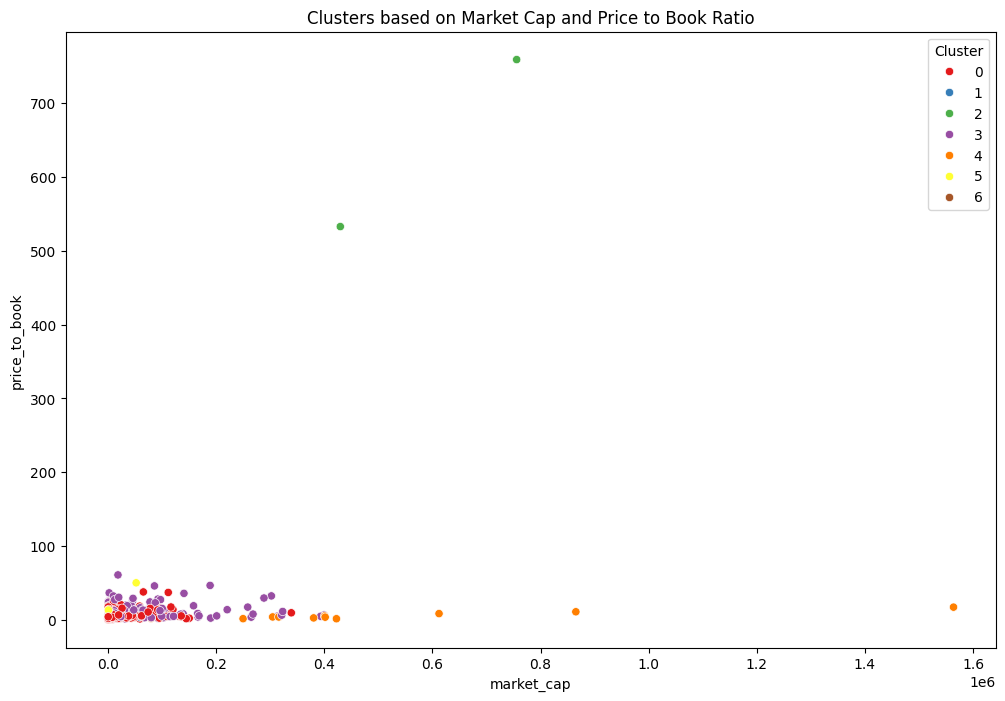

In [6]:
# Example visualization of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="market_cap", y="price_to_book", hue="Cluster", data=df_filtered, palette="Set1"
)
plt.title("Clusters based on Market Cap and Price to Book Ratio")
plt.show()